## Primera parte: Conexión con MySQL desde Python

#### Instalación del conector

In [3]:
pip install mysql-connector-python

In [ ]:
# Instalación de 'python-dotenv'

In [5]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


#### Configurar credenciales para la conexión

In [5]:
import os
from dotenv import load_dotenv
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las variables de entorno desde el archivo .env
# Esta función busca el archivo .env en la carpeta actual y lo carga.
load_dotenv()

# Configuración credenciales base de datos MySQl (ahora lee de las variables de entorno)
db_config = {
    "host": os.getenv("DB_HOST"),        
    "user": os.getenv("DB_USER"),       
    "password": os.getenv("DB_PASSWORD"),
    "database": os.getenv("DB_NAME")     
}

try:
    # Establecer la conexión
    cnx = mysql.connector.connect(**db_config)
    cursor = cnx.cursor()

    print("Conexión exitosa bbdd!")

    # Aquí es donde harás tus consultas

except mysql.connector.Error as err:
    if err.errno == mysql.connector.errorcode.ER_ACCESS_DENIED_ERROR:
        print("Nombre de usuario o contraseña incorrectas")
    elif err.errno == mysql.connector.errorcode.ER_BAD_DB_ERROR:
        print("Base de datos inexistente")
    else:
        print(err)
finally:
    # Asegurarse de cerrar la conexión
    if 'cnx' in locals() and cnx.is_connected():
        cursor.close()
        cnx.close()
        print("Conexión MySQL cerrada.")

Conexión exitosa bbdd!
Conexión MySQL cerrada.


#### Configuración Global de la Base de Datos y Funciones de Conexión 

In [26]:
# --- Celda 1: Configuración Global de la Base de Datos y Funciones de Conexión ---
# Configuración de la base de datos (definida una sola vez)
def ejecutar_consulta(query, params=None):
    """
    Establece una conexión, ejecuta una consulta SELECT y devuelve los resultados en un DataFrame.
    Cierra la conexión automáticamente.
    """
    cnx = None
    cursor = None
    try:
        cnx = mysql.connector.connect(**db_config)
        cursor = cnx.cursor()
        if params:
            cursor.execute(query, params)
        else:
            cursor.execute(query)
        column_names = [i[0] for i in cursor.description]
        results = cursor.fetchall()
        df = pd.DataFrame(results, columns=column_names)
        return df
    except mysql.connector.Error as err:
        print(f"Error al conectar o ejecutar la consulta: {err}")
        return pd.DataFrame()
    finally:
        if cursor:
            cursor.close()
        if cnx and cnx.is_connected():
            cnx.close()
            # print("Conexión MySQL cerrada.") # Comentado para no saturar la salida


### Ejercicio 1

In [29]:
print("--- Ejercicio 1: Países del continente europeo ---")
query_ej1 = """
SELECT Name, Population
FROM country
WHERE Continent = 'Europe';
"""
df_ej1 = ejecutar_consulta(query_ej1)
if not df_ej1.empty:
    print(df_ej1)
else:
    print("No se encontraron resultados para el Ejercicio 1.")

--- Ejercicio 1: Países del continente europeo ---
                             Name  Population
0                         Albania     3401200
1                         Andorra       78000
2                         Austria     8091800
3                         Belgium    10239000
4                        Bulgaria     8190900
5          Bosnia and Herzegovina     3972000
6                         Belarus    10236000
7                     Switzerland     7160400
8                  Czech Republic    10278100
9                         Germany    82164700
10                        Denmark     5330000
11                          Spain    39441700
12                        Estonia     1439200
13                        Finland     5171300
14                         France    59225700
15                  Faroe Islands       43000
16                 United Kingdom    59623400
17                      Gibraltar       25000
18                         Greece    10545700
19                        Cro

--- Ejercicio 1: Países del continente europeo ---
                             Name  Population
0                         Albania     3401200
1                         Andorra       78000
2                         Austria     8091800
3                         Belgium    10239000
4                        Bulgaria     8190900
5          Bosnia and Herzegovina     3972000
6                         Belarus    10236000
7                     Switzerland     7160400
8                  Czech Republic    10278100
9                         Germany    82164700
10                        Denmark     5330000
11                          Spain    39441700
12                        Estonia     1439200
13                        Finland     5171300
14                         France    59225700
15                  Faroe Islands       43000
16                 United Kingdom    59623400
17                      Gibraltar       25000
18                         Greece    10545700
19                        Cro

C:\Users\lisa_\AppData\Local\Temp\ipykernel_16812\1414888837.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='NumberOfCountries', data=df_ej6, palette='viridis')


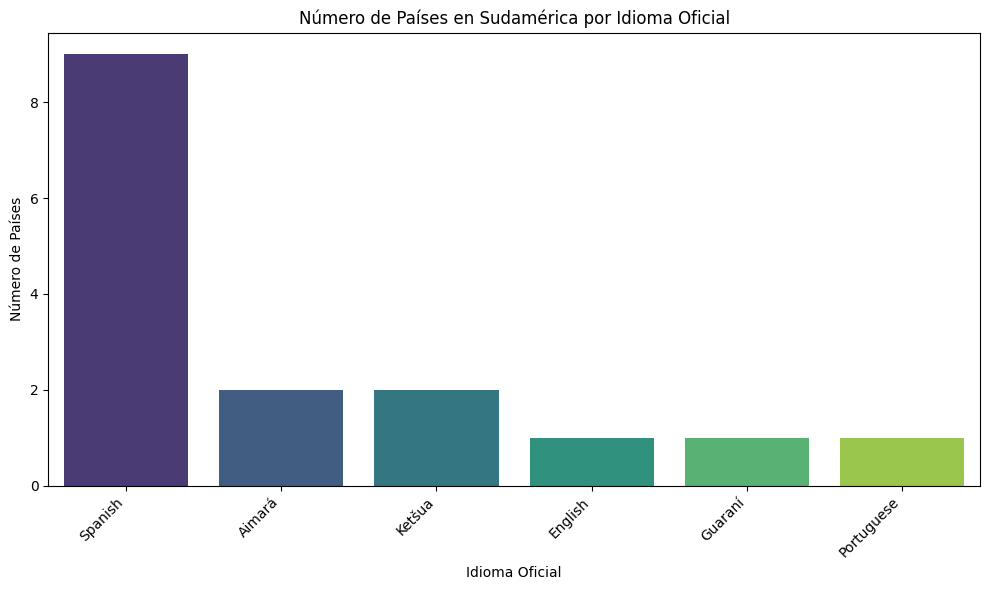


--- Ejercicio 7: Países con esperanza de vida > 75 y histograma ---
Países con esperanza de vida > 75 años:
                       Name LifeExpectancy
0                   Andorra           83.5
1                     Macao           81.6
2                San Marino           81.1
3                     Japan           80.7
4                 Singapore           80.1
..                      ...            ...
57  Virgin Islands, British           75.4
58                  Jamaica           75.2
59                  Uruguay           75.2
60                Argentina           75.1
61           American Samoa           75.1

[62 rows x 2 columns]


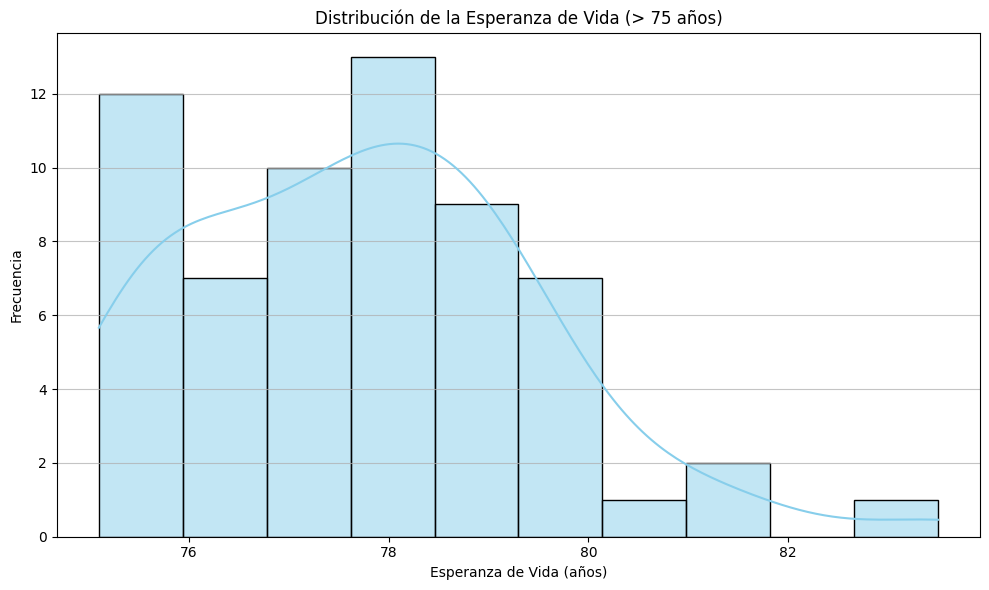


--- Ejercicio 8: Densidad poblacional y gráfico de dispersión ---
Densidad poblacional de algunos países (primeras 10 filas):
                   Name      Continent  Population SurfaceArea  \
0                 Aruba  North America      103000      193.00   
1           Afghanistan           Asia    22720000   652090.00   
2                Angola         Africa    12878000  1246700.00   
3              Anguilla  North America        8000       96.00   
4               Albania         Europe     3401200    28748.00   
5               Andorra         Europe       78000      468.00   
6  Netherlands Antilles  North America      217000      800.00   
7  United Arab Emirates           Asia     2441000    83600.00   
8             Argentina  South America    37032000  2780400.00   
9               Armenia           Asia     3520000    29800.00   

  PopulationDensity  
0          533.6788  
1           34.8418  
2           10.3297  
3           83.3333  
4          118.3108  
5          166

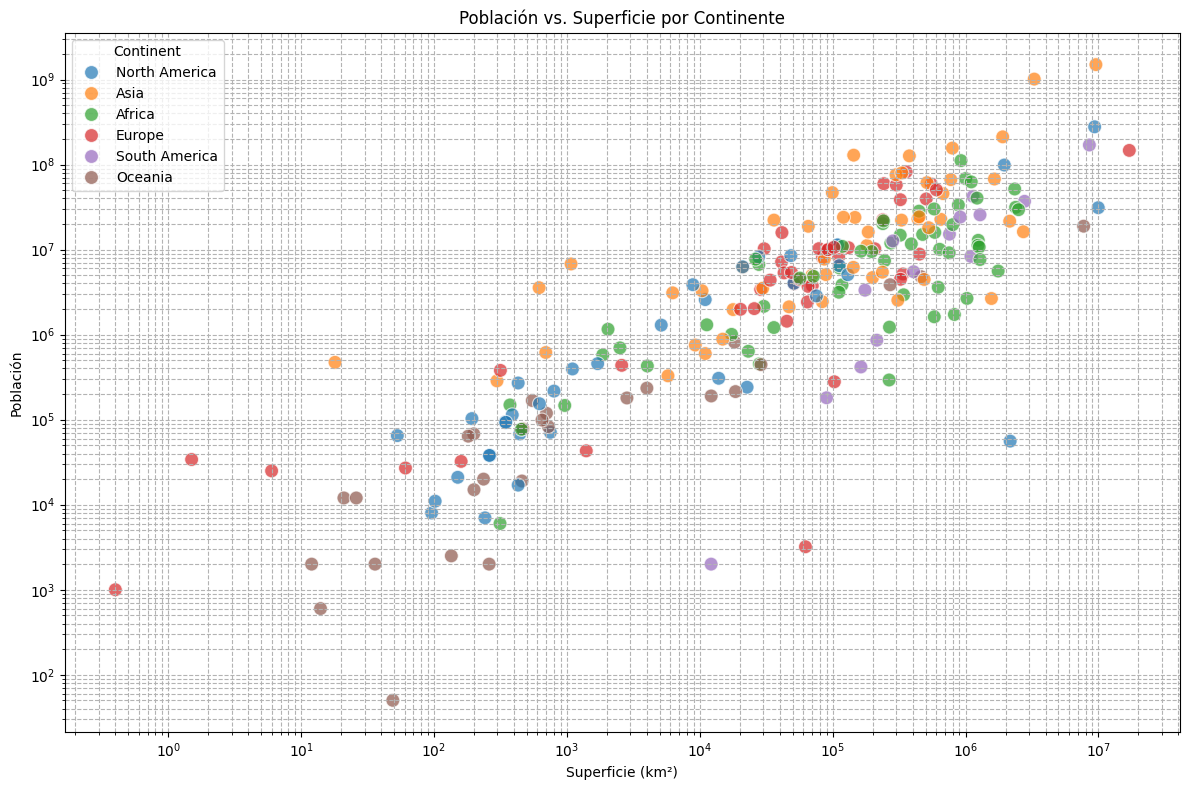


--- Ejercicio 9: Ciudades con más de 5 millones de habitantes ---
Ciudades con más de 5 millones de habitantes:
                 Name  Population
0     Mumbai (Bombay)    10500000
1               Seoul     9981619
2           São Paulo     9968485
3            Shanghai     9696300
4             Jakarta     9604900
5             Karachi     9269265
6            Istanbul     8787958
7    Ciudad de México     8591309
8              Moscow     8389200
9            New York     8008278
10              Tokyo     7980230
11             Peking     7472000
12             London     7285000
13              Delhi     7206704
14              Cairo     6789479
15            Teheran     6758845
16               Lima     6464693
17          Chongqing     6351600
18            Bangkok     6320174
19  Santafé de Bogotá     6260862
20     Rio de Janeiro     5598953
21            Tianjin     5286800
22           Kinshasa     5064000
23             Lahore     5063499


C:\Users\lisa_\AppData\Local\Temp\ipykernel_16812\1414888837.py:269: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population', y='Name', data=df_ej9, palette='coolwarm')


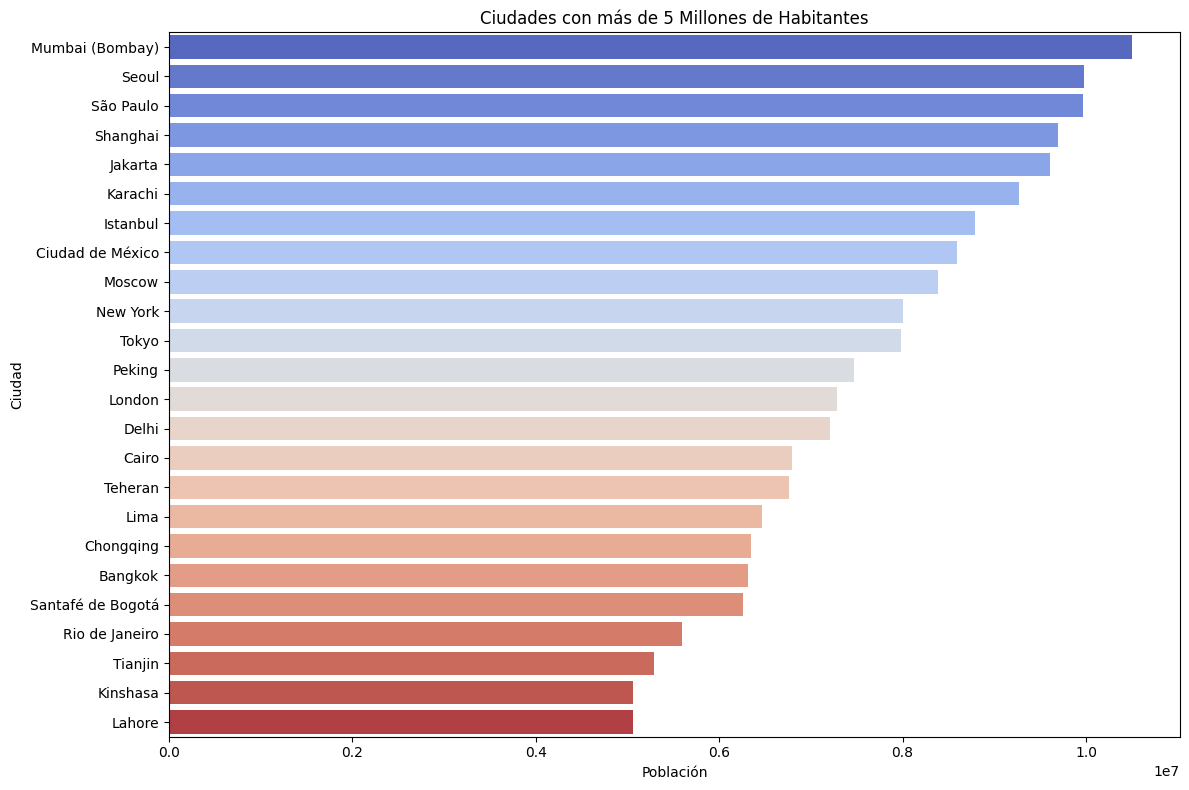


--- Ejercicio 10: Gráfico de pastel de idiomas por continente ---
Número de idiomas únicos por continente:
       Continent  NumberOfLanguages
0         Africa                215
1           Asia                138
2         Europe                 62
3  North America                 43
4        Oceania                 43
5  South America                 21


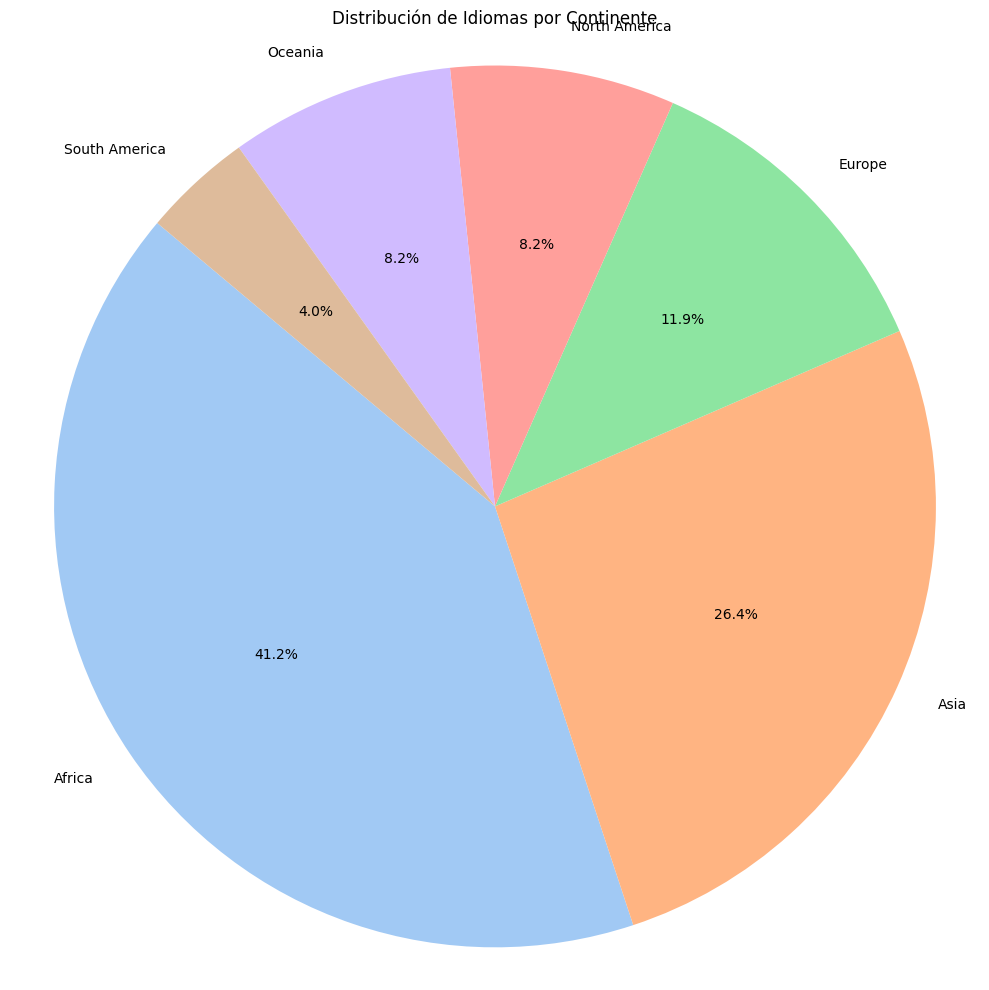

In [12]:


# --- Celda 3: Ejercicio 2 ---
print("\n--- Ejercicio 2: Cinco países más grandes por área ---")
query_ej2 = """
SELECT Name, SurfaceArea
FROM country
ORDER BY SurfaceArea DESC
LIMIT 5;
"""
df_ej2 = ejecutar_consulta(query_ej2)
if not df_ej2.empty:
    print(df_ej2)
else:
    print("No se encontraron resultados para el Ejercicio 2.")


# --- Celda 4: Ejercicio 3 ---
print("\n--- Ejercicio 3: Población total por continente ---")
query_ej3 = """
SELECT Continent, SUM(Population) AS TotalPopulation
FROM country
GROUP BY Continent
ORDER BY TotalPopulation DESC;
"""
df_ej3 = ejecutar_consulta(query_ej3)
if not df_ej3.empty:
    print(df_ej3)
else:
    print("No se encontraron resultados para el Ejercicio 3.")


# --- Celda 5: Ejercicio 4 ---
print("\n--- Ejercicio 4: Ciudades de Europa ordenadas por población ---")
query_ej4 = """
SELECT
    city.Name AS CityName,
    city.Population AS CityPopulation,
    country.Name AS CountryName
FROM city
JOIN country ON city.CountryCode = country.Code
WHERE country.Continent = 'Europe'
ORDER BY city.Population DESC;
"""
df_ej4 = ejecutar_consulta(query_ej4)
if not df_ej4.empty:
    print(df_ej4)
else:
    print("No se encontraron resultados para el Ejercicio 4.")


# --- Celda 6: Ejercicio 5 (Actualización) ---
print("\n--- Ejercicio 5: Actualizar la población de China ---")
# Primero, consulta la población actual de China para ver el estado inicial
print("Población actual de China (antes de la actualización):")
query_check_before = "SELECT Name, Population FROM country WHERE Code = 'CHN';"
df_before = ejecutar_consulta(query_check_before)
if not df_before.empty:
    print(df_before)
else:
    print("No se encontró el país China.")

# Realiza la actualización
new_population = 1500000000
country_code = 'CHN'
query_ej5 = "UPDATE country SET Population = %s WHERE Code = %s;"
print(f"\nActualizando la población de China (CHN) a {new_population}...")
if ejecutar_actualizacion(query_ej5, (new_population, country_code)):
    print("Actualización completada.")
    # Consulta la población de China después de la actualización para verificar
    print("\nPoblación de China (después de la actualización):")
    df_after = ejecutar_consulta(query_check_before)
    if not df_after.empty:
        print(df_after)
    else:
        print("No se encontró el país China después de la actualización.")
else:
    print("La actualización falló.")


# --- Celda 7: Ejercicio 6 (con gráfico) ---
print("\n--- Ejercicio 6: Idiomas oficiales en Sudamérica y gráfico ---")
query_ej6 = """
SELECT
    CL.Language,
    COUNT(DISTINCT C.Code) AS NumberOfCountries
FROM countrylanguage AS CL
JOIN country AS C ON CL.CountryCode = C.Code
WHERE C.Continent = 'South America' AND CL.IsOfficial = 'T'
GROUP BY CL.Language
ORDER BY NumberOfCountries DESC;
"""
df_ej6 = ejecutar_consulta(query_ej6)

if not df_ej6.empty:
    print("Idiomas oficiales en Sudamérica y número de países que los comparten:")
    print(df_ej6)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Language', y='NumberOfCountries', data=df_ej6, palette='viridis')
    plt.title('Número de Países en Sudamérica por Idioma Oficial')
    plt.xlabel('Idioma Oficial')
    plt.ylabel('Número de Países')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron resultados para el Ejercicio 6.")


# --- Celda 8: Ejercicio 7 (con gráfico) ---
print("\n--- Ejercicio 7: Países con esperanza de vida > 75 y histograma ---")
query_ej7 = """
SELECT Name, LifeExpectancy
FROM country
WHERE LifeExpectancy > 75
ORDER BY LifeExpectancy DESC;
"""
df_ej7 = ejecutar_consulta(query_ej7)

if not df_ej7.empty:
    print("Países con esperanza de vida > 75 años:")
    print(df_ej7)

    plt.figure(figsize=(10, 6))
    sns.histplot(df_ej7['LifeExpectancy'], bins=10, kde=True, color='skyblue')
    plt.title('Distribución de la Esperanza de Vida (> 75 años)')
    plt.xlabel('Esperanza de Vida (años)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron resultados para el Ejercicio 7.")


# --- Celda 9: Ejercicio 8 (con gráfico) ---
print("\n--- Ejercicio 8: Densidad poblacional y gráfico de dispersión ---")
query_ej8 = """
SELECT
    Name,
    Continent,
    Population,
    SurfaceArea,
    (Population / SurfaceArea) AS PopulationDensity
FROM country
WHERE SurfaceArea > 0 AND Population > 0;
"""
df_ej8 = ejecutar_consulta(query_ej8)

if not df_ej8.empty:
    print("Densidad poblacional de algunos países (primeras 10 filas):")
    print(df_ej8.head(10))

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='SurfaceArea', y='Population', hue='Continent', data=df_ej8, s=100, alpha=0.7)
    plt.title('Población vs. Superficie por Continente')
    plt.xlabel('Superficie (km²)')
    plt.ylabel('Población')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron resultados para el Ejercicio 8.")


# --- Celda 10: Ejercicio 9 (con gráfico) ---
print("\n--- Ejercicio 9: Ciudades con más de 5 millones de habitantes ---")
query_ej9 = """
SELECT Name, Population
FROM city
WHERE Population > 5000000
ORDER BY Population DESC;
"""
df_ej9 = ejecutar_consulta(query_ej9)

if not df_ej9.empty:
    print("Ciudades con más de 5 millones de habitantes:")
    print(df_ej9)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Population', y='Name', data=df_ej9, palette='coolwarm')
    plt.title('Ciudades con más de 5 Millones de Habitantes')
    plt.xlabel('Población')
    plt.ylabel('Ciudad')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron resultados para el Ejercicio 9.")


# --- Celda 11: Ejercicio 10 (con gráfico) ---
print("\n--- Ejercicio 10: Gráfico de pastel de idiomas por continente ---")
query_ej10 = """
SELECT
    C.Continent,
    COUNT(DISTINCT CL.Language) AS NumberOfLanguages
FROM country AS C
JOIN countrylanguage AS CL ON C.Code = CL.CountryCode
GROUP BY C.Continent
ORDER BY NumberOfLanguages DESC;
"""
df_ej10 = ejecutar_consulta(query_ej10)

if not df_ej10.empty:
    print("Número de idiomas únicos por continente:")
    print(df_ej10)

    plt.figure(figsize=(10, 10))
    plt.pie(df_ej10['NumberOfLanguages'], labels=df_ej10['Continent'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Distribución de Idiomas por Continente')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron resultados para el Ejercicio 10.")
